In [10]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [11]:
# === Load dataset ===
df = pd.read_csv("data/voice_dataset.csv")

# === Fitur 36 kolom ===
feature_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[feature_cols].to_numpy()
y = df["status"].to_numpy()  # 0 = buka, 1 = tutup

print("=== Daftar Fitur yang Digunakan ===")
for i, col in enumerate(feature_cols, start=1):
    print(f"{i}. {col}")
print(f"\nTotal fitur: {len(feature_cols)} kolom\n")
print(f"Jumlah sampel: {X.shape[0]} suara\n")

=== Daftar Fitur yang Digunakan ===
1. mfcc0
2. mfcc1
3. mfcc2
4. mfcc3
5. mfcc4
6. mfcc5
7. mfcc6
8. mfcc7
9. mfcc8
10. mfcc9
11. mfcc10
12. mfcc11
13. mfcc12
14. mfcc13
15. mfcc14
16. mfcc15
17. mfcc16
18. mfcc17
19. mfcc18
20. mfcc19
21. mfcc20
22. mfcc21
23. mfcc22
24. mfcc23
25. mfcc24
26. mfcc25
27. mfcc26
28. mfcc27
29. mfcc28
30. mfcc29
31. mfcc30
32. mfcc31
33. mfcc32
34. mfcc33
35. mfcc34
36. mfcc35
37. mfcc36

Total fitur: 37 kolom

Jumlah sampel: 600 suara



In [12]:
# === CEK MISSING VALUE ===
print("=== CEK MISSING VALUE ===")
missing = df.isnull().sum()

print(missing[missing > 0])  # tampilkan hanya kolom yang memiliki missing

total_missing = missing.sum()
print(f"\nTotal missing value: {total_missing}")

if total_missing == 0:
    print("Tidak ada missing value.")


=== CEK MISSING VALUE ===
Series([], dtype: int64)

Total missing value: 0
Tidak ada missing value.


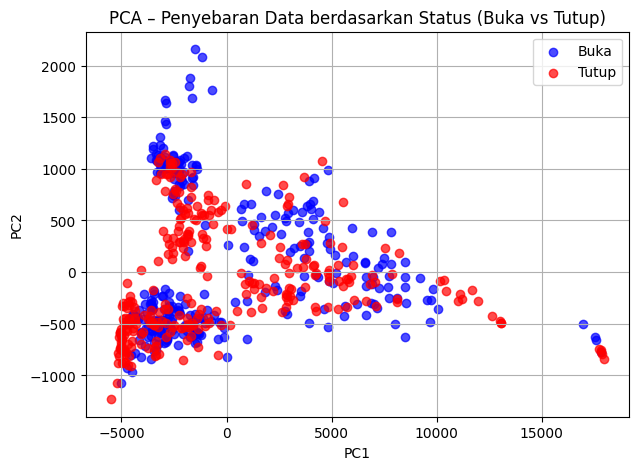

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
df = pd.read_csv("data/voice_dataset.csv")

feature_cols = [c for c in df.columns if c.startswith("mfcc")]
X = df[feature_cols].values
y_status = df["status"].values  # 0=buka, 1=tutup

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))
colors = ["blue", "red"]
labels = ["Buka", "Tutup"]

for val in [0, 1]:
    idx = (y_status == val)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1],
                alpha=0.7, label=labels[val], c=colors[val])

plt.title("PCA – Penyebaran Data berdasarkan Status (Buka vs Tutup)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
import numpy as np

# Hitung batas outlier per kolom
Q1 = df[feature_cols].quantile(0.25)
Q3 = df[feature_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mask outlier (boolean untuk setiap row)
outlier_mask = (df[feature_cols] < lower_bound) | (df[feature_cols] > upper_bound)
outlier_mask = outlier_mask.any(axis=1)  # True jika baris memiliki outlier
# Ambil semua file yang mengandung outlier
outlier_files = df.loc[outlier_mask, "filename"].unique()

print("=== File Penyebab Outlier ===")
for f in outlier_files:
    print(f"- {f}")

print(f"\nTotal file bermasalah: {len(outlier_files)}")


=== File Penyebab Outlier ===
- Tutup_baru (12).wav
- Tutup_baru (13).wav
- Tutup_baru (15).wav
- Tutup_baru (6).wav
- Tutup_baru (62).wav
- Tutup_baru (63).wav
- Tutup_baru (64).wav
- Tutup_baru (65).wav
- Tutup_baru (66).wav
- Tutup_baru (67).wav
- Tutup_baru (7).wav
- Tutup_baru (70).wav
- Tutup_baru (79).wav
- Tutup_baru (83).wav
- Tutup_baru (84).wav
- Tutup_baru (86).wav
- Tutup_baru (87).wav
- Tutup_baru (89).wav
- Tutup_baru (90).wav
- Tutup_baru (91).wav
- Tutup_baru (92).wav
- Rekaman baru 1.wav
- Rekaman baru 12.wav
- Rekaman baru 14.wav
- Rekaman baru 17.wav
- Rekaman baru 18.wav
- Rekaman baru 19.wav
- Rekaman baru 20.wav
- Rekaman baru 21.wav
- Rekaman baru 23.wav
- Rekaman baru 29.wav
- Rekaman baru 30.wav
- Rekaman baru 31.wav
- Rekaman baru 32.wav
- Rekaman baru 36.wav
- Rekaman baru 43.wav
- Rekaman baru 44.wav
- Rekaman baru 45.wav
- Rekaman baru 56.wav
- Rekaman baru 61.wav
- Rekaman baru 62.wav
- Rekaman baru 69.wav
- Rekaman baru 7.wav
- Rekaman baru 70.wav
- Reka

In [28]:
print("=== Jumlah Outlier per Fitur ===")
outlier_counts = (df[feature_cols] < lower_bound) | (df[feature_cols] > upper_bound)
outlier_counts = outlier_counts.sum().sort_values(ascending=False)
print(outlier_counts)


=== Jumlah Outlier per Fitur ===
mfcc32    58
mfcc12    29
mfcc30    21
mfcc34    18
mfcc10    15
mfcc36    13
mfcc29    12
mfcc8     10
mfcc0      8
mfcc25     5
mfcc4      5
mfcc2      4
mfcc28     4
mfcc5      3
mfcc3      3
mfcc6      2
mfcc11     2
mfcc9      1
mfcc27     1
mfcc26     1
mfcc1      0
mfcc20     0
mfcc19     0
mfcc18     0
mfcc17     0
mfcc16     0
mfcc15     0
mfcc14     0
mfcc13     0
mfcc7      0
mfcc22     0
mfcc23     0
mfcc24     0
mfcc21     0
mfcc31     0
mfcc33     0
mfcc35     0
dtype: int64


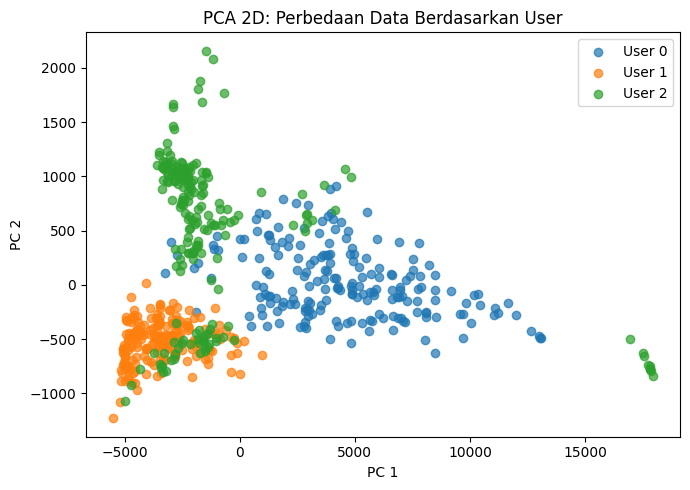

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df[feature_cols].values
y_user = df["user"].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 5))

for user in sorted(df['user'].unique()):
    idx = (y_user == user)
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], alpha=0.7, label=f'User {user}')

plt.title("PCA 2D: Perbedaan Data Berdasarkan User")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Pipeline RandomForest + StandardScaler ===
model_status = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# === Training ===
model_status.fit(X_train, y_train)

# === Prediksi ===
y_pred = model_status.predict(X_test)

# === Evaluasi ===
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=["buka", "tutup"])

print("=== Hasil Evaluasi Model Status ===")
print(f"Akurasi: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)




=== Hasil Evaluasi Model Status ===
Akurasi: 0.9583

Confusion Matrix:
[[57  3]
 [ 2 58]]

Classification Report:
              precision    recall  f1-score   support

        buka       0.97      0.95      0.96        60
       tutup       0.95      0.97      0.96        60

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [16]:
# === Simpan model dan feature order ===
os.makedirs("models", exist_ok=True)
joblib.dump(model_status, "models/status_model.pkl")
joblib.dump(feature_cols, "models/feature_cols.pkl")

print("\n[INFO] Model status berhasil disimpan.")


[INFO] Model status berhasil disimpan.


In [17]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [18]:
# === Load dataset ===
df = pd.read_csv("data/voice_dataset.csv")

# === Fitur 36 kolom ===
feature_cols = [col for col in df.columns if col.startswith("mfcc")]
X = df[feature_cols].to_numpy()
y = df["user"].to_numpy()  # 0 = user1, 1 = user2

# === Tampilkan fitur yang digunakan ===
print("=== Daftar Fitur yang Digunakan ===")
for i, col in enumerate(feature_cols, start=1):
    print(f"{i}. {col}")
print(f"\nTotal fitur: {len(feature_cols)} kolom\n")

=== Daftar Fitur yang Digunakan ===
1. mfcc0
2. mfcc1
3. mfcc2
4. mfcc3
5. mfcc4
6. mfcc5
7. mfcc6
8. mfcc7
9. mfcc8
10. mfcc9
11. mfcc10
12. mfcc11
13. mfcc12
14. mfcc13
15. mfcc14
16. mfcc15
17. mfcc16
18. mfcc17
19. mfcc18
20. mfcc19
21. mfcc20
22. mfcc21
23. mfcc22
24. mfcc23
25. mfcc24
26. mfcc25
27. mfcc26
28. mfcc27
29. mfcc28
30. mfcc29
31. mfcc30
32. mfcc31
33. mfcc32
34. mfcc33
35. mfcc34
36. mfcc35
37. mfcc36

Total fitur: 37 kolom



In [19]:
# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Pipeline RandomForest + StandardScaler ===
model_user = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# === Training ===
model_user.fit(X_train, y_train)

# === Prediksi pada data uji ===
y_pred = model_user.predict(X_test)

# === Evaluasi ===
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["user1", "user2", "user3"])

print("=== Hasil Evaluasi Model User ===")
print(f"Akurasi: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(report)


=== Hasil Evaluasi Model User ===
Akurasi: 1.0000

Confusion Matrix:
[[40  0  0]
 [ 0 40  0]
 [ 0  0 40]]

Classification Report:
              precision    recall  f1-score   support

       user1       1.00      1.00      1.00        40
       user2       1.00      1.00      1.00        40
       user3       1.00      1.00      1.00        40

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [20]:
# === Simpan model dan feature order ===
os.makedirs("models", exist_ok=True)
joblib.dump(model_user, "models/user_model.pkl")
joblib.dump(feature_cols, "models/feature_cols.pkl")

print("\n[INFO] Model user berhasil disimpan.")


[INFO] Model user berhasil disimpan.
